# The Galaxy Luminosity Function

## Authors
B.W. Holwerda

## Learning Goals
* Understand Survey limits
* Link between redshift and apparent magnitude
* Logarithmic axes
* Volume and completeness correction

## Keywords
Galaxies, Luminosity Function, Malmquist bias, volume correction.

## Companion Content
Ryden & Peterson's "Foundations in Astrophysics" 

## Summary


<hr>


## Student Name and ID:



## Date:

<hr>

This exercise uses the 2 Micron All-Sky Survey (2MASS) database to generate an idea of how many galaxies of different luminosities there are in the local Universe. We will learn how the limits of the survey set the volume representative for each galaxy. 

1. read in the 2MASS file 

2. plot a histogram of the apparent luminosities in J-band 

3. plot the redshift of these galaxies and their apparent magnitude. What do you notice? 

3. use the redshift to get a luminosity distance and absolute J-band luminosities. Plot this histogram. Which kind of galaxy are there the most of? 

4. Using this plot, explain the Malmquist bias in this selection.

5. To correct for our selection biases, we will define the volume over which we *could have detected* each galaxy. 
The limiting magnitude of 2MASS is 15.0 for extended sources (i.e. galaxies). 
How do we define limiting distance for each galaxy if the limiting apparent magnitude for the survey is m=15?
How big a volume (sphere) does that correspond to?





In [2]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from astropy.io import ascii
from astropy.io import fits
hdul = fits.open('2mass_envir.fits')
data = hdul[1].data
cols = hdul[1].columns
cols.info()

# apparent magnitude in J-band
magJ = data['JTMAG']
# redshift x speed of light = redshifted velocity
cz = data['CZ']


name:
    ['ID', 'RA', 'DEC', 'KCMAG', 'HCMAG', 'JCMAG', 'KTMAG', 'HTMAG', 'JTMAG', 'E_KCMAG', 'E_HCMAG', 'E_JCMAG', 'E_KTMAG', 'E_HTMAG', 'E_JTMAG', 'CZ', 'CENSAT', 'GROUPMASS', 'NUMDENS', 'NDIST']
format:
    ['16A', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'I', 'D', 'D', 'D']
unit:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
null:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
bscale:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
bzero:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
disp:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
start:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
dim:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
coord_type:
    ['', '', '', '', '', '', '', '

## 1. Plot a histogram of the apparent magnitudes 

In [1]:
# student work here:


## 2. Plot the distance - apparent magnitude

What do you notice about the relation between apparent magnitude and redshift.

In [2]:
# student work 


*your intepretation here*

## 3. Plot the Absolute Magnitude as a function of redshift

compute the distance to each galaxy assuming Hubble flow: $v=H_0 \times D$
How far out can the brightest galaxies be detected? And how far out the dimmest? How will that affect the numbers we have on both those populations?

In [3]:
# student work


*your answer here*

## 4. Histogram of Absolute Magnitude

Make a histogram of the absolute magnitudes. Which bin is relatively over-represented? Alternatively, which bin is missing the most due to the limiting apparent magnitude of the survey? 

In [4]:
# student work


*Your interpretation here*

## 5. Histogram of Absolute Magnitude corrected for survey sensitivity

Make a second histogram of the absolute magnitudes but now weigh each entry by the volume is could have been detected in. The limiting distance for 2MASS is 15.03 in J-band. 
Each galaxy of absolute magniture M_J can be detected out to:

$$ D_{lim} = 10^{ (m_{lim} - M_J + 5)/5.}$$

And this defines a volume for a given survey for each galaxy found: $V_{max} = A_{survey} \times D_{lim}$.

2MASS is an *all-sky* survey. Weigh each entry in the second histogram by $1/V_{max}$. How much as your histogram changed? What are the most common galaxies and what are the rarest *in a fixed volume*?

tip: plt.hist(x) can take some extra commands:
plt.hist(x, range=[xmin,xmax], log=True, weights=y) shows a histogram within a certain range of values, logarithmic y-axis and weighted by y.

In [5]:
# student work


*your answer here*

## BONUS: The Schechter Function

A convenient approximation to the luminosity function was suggested by Paul Schechter in
1976.

In this expression: 
* $\phi^*$ is a normalization factor which defines the overall density of galaxies (number per
cubic Mpc).
* $L^*$ is a characteristic galaxy luminosity. An $L^*$ galaxy is a bright galaxy, roughly
comparable in luminosity to the Milky Way. A galaxy with $L < 0.1 L^*$ is a dwarf. !
* $\alpha$ defines the `faint-end slope’ of the luminosity function. a is typically negative,
implying large numbers of galaxies with low luminosities.

In magnitudes:

$$ \phi(M) = 0.4ln10 \phi^* [10^{0.4(M^*-M)} ]^{1+\alpha} exp[-10^{0.4(M^*-M)}] $$

In luminosities:

$$ \Phi(L) = \left({\phi^* \over L^* }\right) \left({L \over L^*}\right)^\alpha exp \left(- {L \over L^*} \right) $$

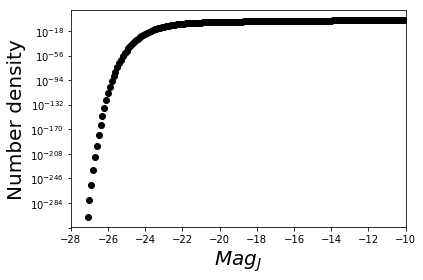

In [29]:
Mstar = -20.
alpha = -1.3
M = np.arange(-28,-10,0.1)

phi = 0.4*np.log(10)* ( (10**(0.4*Mstar-M))**(1.+alpha) )*np.exp(-10**(0.4*(Mstar - M) ) )


plt.figure()
plt.subplot(111)
plt.plot(M,phi,'ko')
plt.xlim(-28,-10)
plt.yscale("log", nonposy='clip')
plt.xlabel(r'$Mag_J$', fontsize=20)
plt.ylabel(r'Number density', fontsize=20)
plt.savefig('cz_MagJ.png',bbox_inches='tight')



## References

the 2 Micron All Sky Survey (2MASS)

http://adsabs.harvard.edu/abs/2006AJ....131.1163S
    
